DATA INTEGRATION

In [1]:
#Loading the libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import datetime
import random
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from pyclustering.cluster.clarans import clarans
from pyclustering.utils import timedcall
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Importing the dataset
data = pd.read_csv("C:/Users/Rodrigo/Desktop/Data Analytics/Projects/CustomerSegmentation/marketing_campaign.csv", sep = "\t")
print("Number of datapoints: ", len(data))
data.head()

Number of datapoints:  2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
#About the dataset - Known information
##We can group the features into 4 different groups
### Customer Information: ID, Year_Birth, Education, Marital Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, Complain
### Products: MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds
### Place: NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth
### Promotion: NumDealsPurchases, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response

DATA UNDERSTANDING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
#Replacing the NA's in Income with KNN
numeric_cols = data.select_dtypes((int, float)).columns.to_list()
numerical_data = data[numeric_cols]
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = knn_imputer.fit_transform(numerical_data)
imputed_data = pd.DataFrame(imputed_data, columns = numeric_cols)
data[numeric_cols] = imputed_data.values
data.isna().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
#Checking when were enrolled th newest and oldest customers
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(data["Dt_Customer"].tolist()))
print("The oldest customer's enrolment date in the records:",min(data["Dt_Customer"].tolist()))



The newest customer's enrolment date in therecords: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [8]:
#Analyzing the total number of categories per feature
print("#Categories - Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("#Categories - Education:\n", data["Education"].value_counts())

#Categories - Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

#Categories - Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [9]:
#Since Alone, Absurd, and YOLO are not real marital Status
data.Marital_Status[data.Marital_Status == "Alone"] = "Single"
data.Marital_Status[data.Marital_Status == "YOLO"] = "Single"
data.Marital_Status[data.Marital_Status == "Absurd"] = "Single"
data.Marital_Status[data.Marital_Status == "Together"] = "Married"

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_21084\6781552.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.Marital_Status[data.Marital_Status == "Alone"] = "Single"
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_21084\6781552.py:2: 

DATA TRANSFORMATION - FEATURE ENGINEERING

In [10]:
day_1=max(pd.to_datetime(data["Dt_Customer"]).tolist()) #taking it to be the newest customer
dates =  pd.to_datetime(data["Dt_Customer"]).tolist()

In [11]:
#Getting the number of days in which the customer is enrolled
days=[]
for i in dates:
    delta = day_1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = data["Customer_For"].dt.days

#Age of customer in the day of analysis 
data["Age"] = datetime.now().year - data["Year_Birth"]

#Total spendings suming all items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation based on marital status"Alone
data["Living"]=data["Marital_Status"].replace({"Married":"Partner", "Widow":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Calculating the total number of dependents
data["Dependents"]=data["Kidhome"]+data["Teenhome"]

#Calculating the family size
data["Family_Size"] = data["Living"].replace({"Alone": 1, "Partner":2})+ data["Dependents"]

#Binary Variable to know if is parent
data["Is_Parent"] = np.where(data.Dependents> 0, 1, 0)

#Simplifying the Education levels
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Simplifying the names of the vaiables associated with the products
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_21084\3004030722.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living"].replace({"Alone": 1, "Partner":2})+ data["Dependents"]


In [12]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52217.437798     0.444196     0.506250    49.109375   303.935714   
std     25112.511715     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35335.500000     0.000000     0.000000    24.000000    23.750000   
50%     51342.000000     0.000000     0.000000    49.000000   173.500000   
75%     68413.250000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  ...   
mean     26.302232   166.950000    37.525446    27.062946    44.021875  ...   
std      39.773434   225.715373    54.628979    41.280498    52.167439  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    67.000000    12.000000     8.000000    24.000000  ...   
75%      33.000000   232.000000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   263.000000   362.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2240.000000   2240.000000  2240.000000  2240.000000   2240.000000   
mean       0.064286      0.013393     0.009375     0.149107    353.582143   
std        0.245316      0.114976     0.096391     0.356274    202.122512   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     0.000000     0.000000    180.750000   
50%        0.000000      0.000000     0.000000     0.000000    355.500000   
75%        0.000000      0.000000     0.000000     0.000000    529.000000   
max        1.000000      1.000000     1.000000     1.000000    699.000000   

               Age        Spent   Dependents  Family_Size    Is_Parent  
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000  
mean     55.194196   605.798214     0.950446     2.595089     0.715179  
std      11.984069   602.249288     0.751803     0.906959     0.451430  
min      28.000000     5.000000     0.000000     1.000000     0.000000  
25%      47.000000    68.750000     0.000000     2.000000     0.000000  
50%      54.000000   396.000000     1.000000     3.000000     1.000000  
75%      65.000000  1045.500000     1.000000     3.000000     1.000000  
max     131.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

DATA CLEANING

<Figure size 800x550 with 0 Axes>

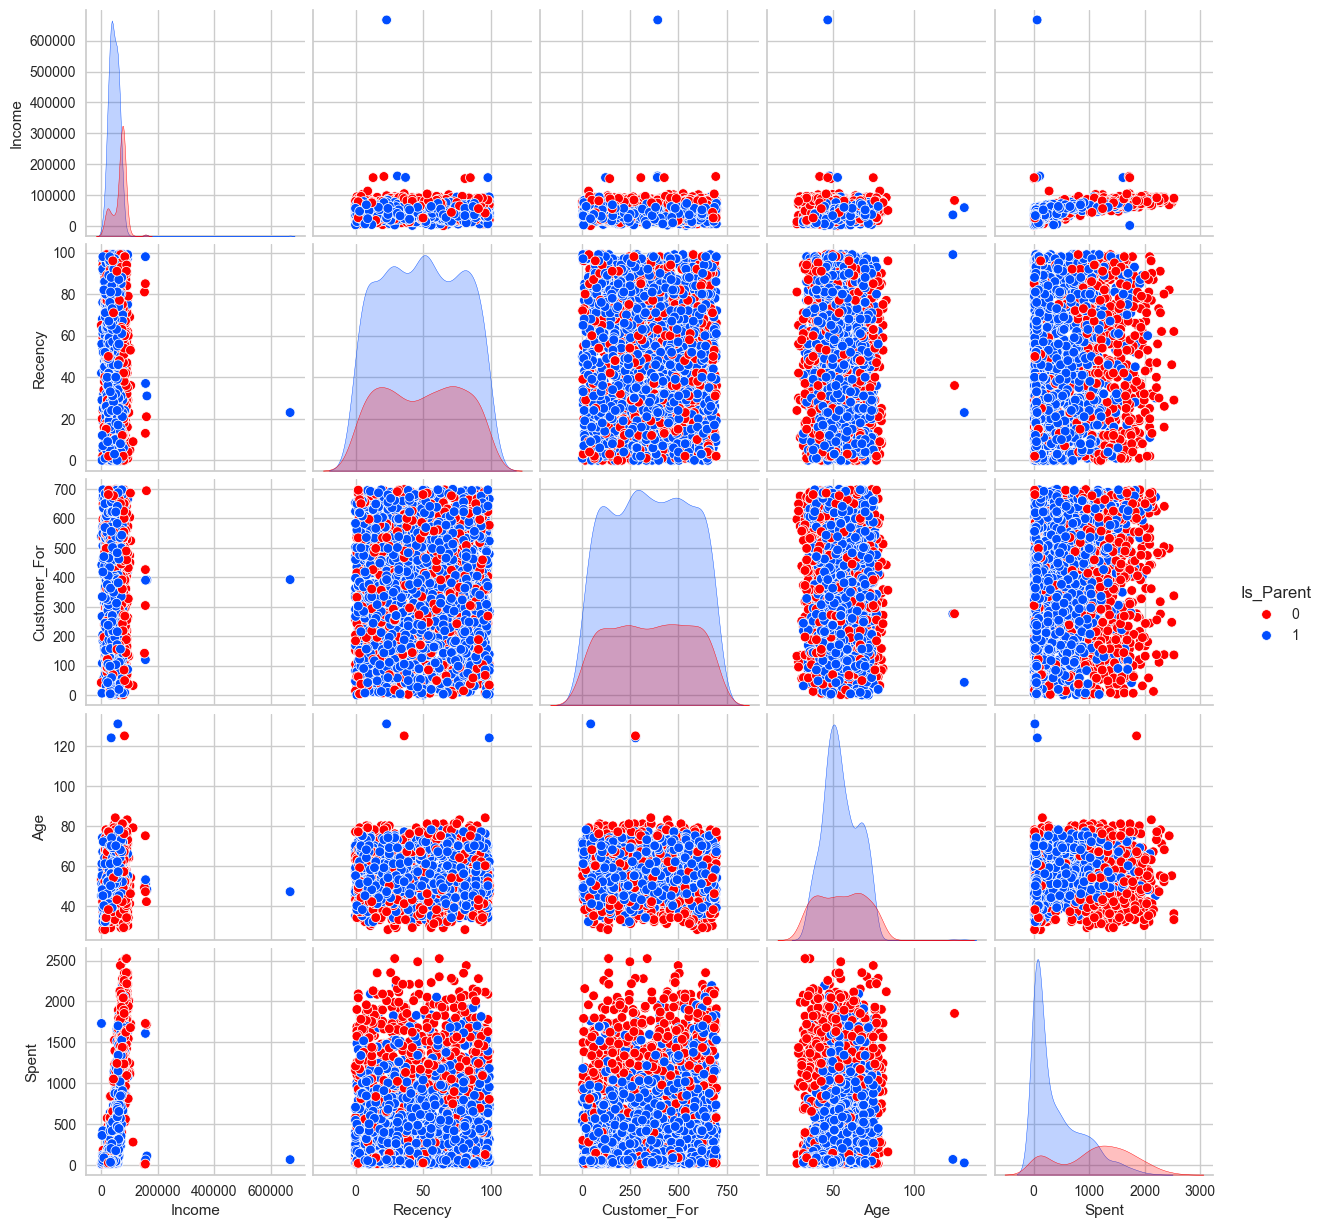

In [13]:
#We can see a big dispersion in the Income and Age Values, let's dig deeper into the Data visualization
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#FF0000","#004DFF"]))

<Axes: >

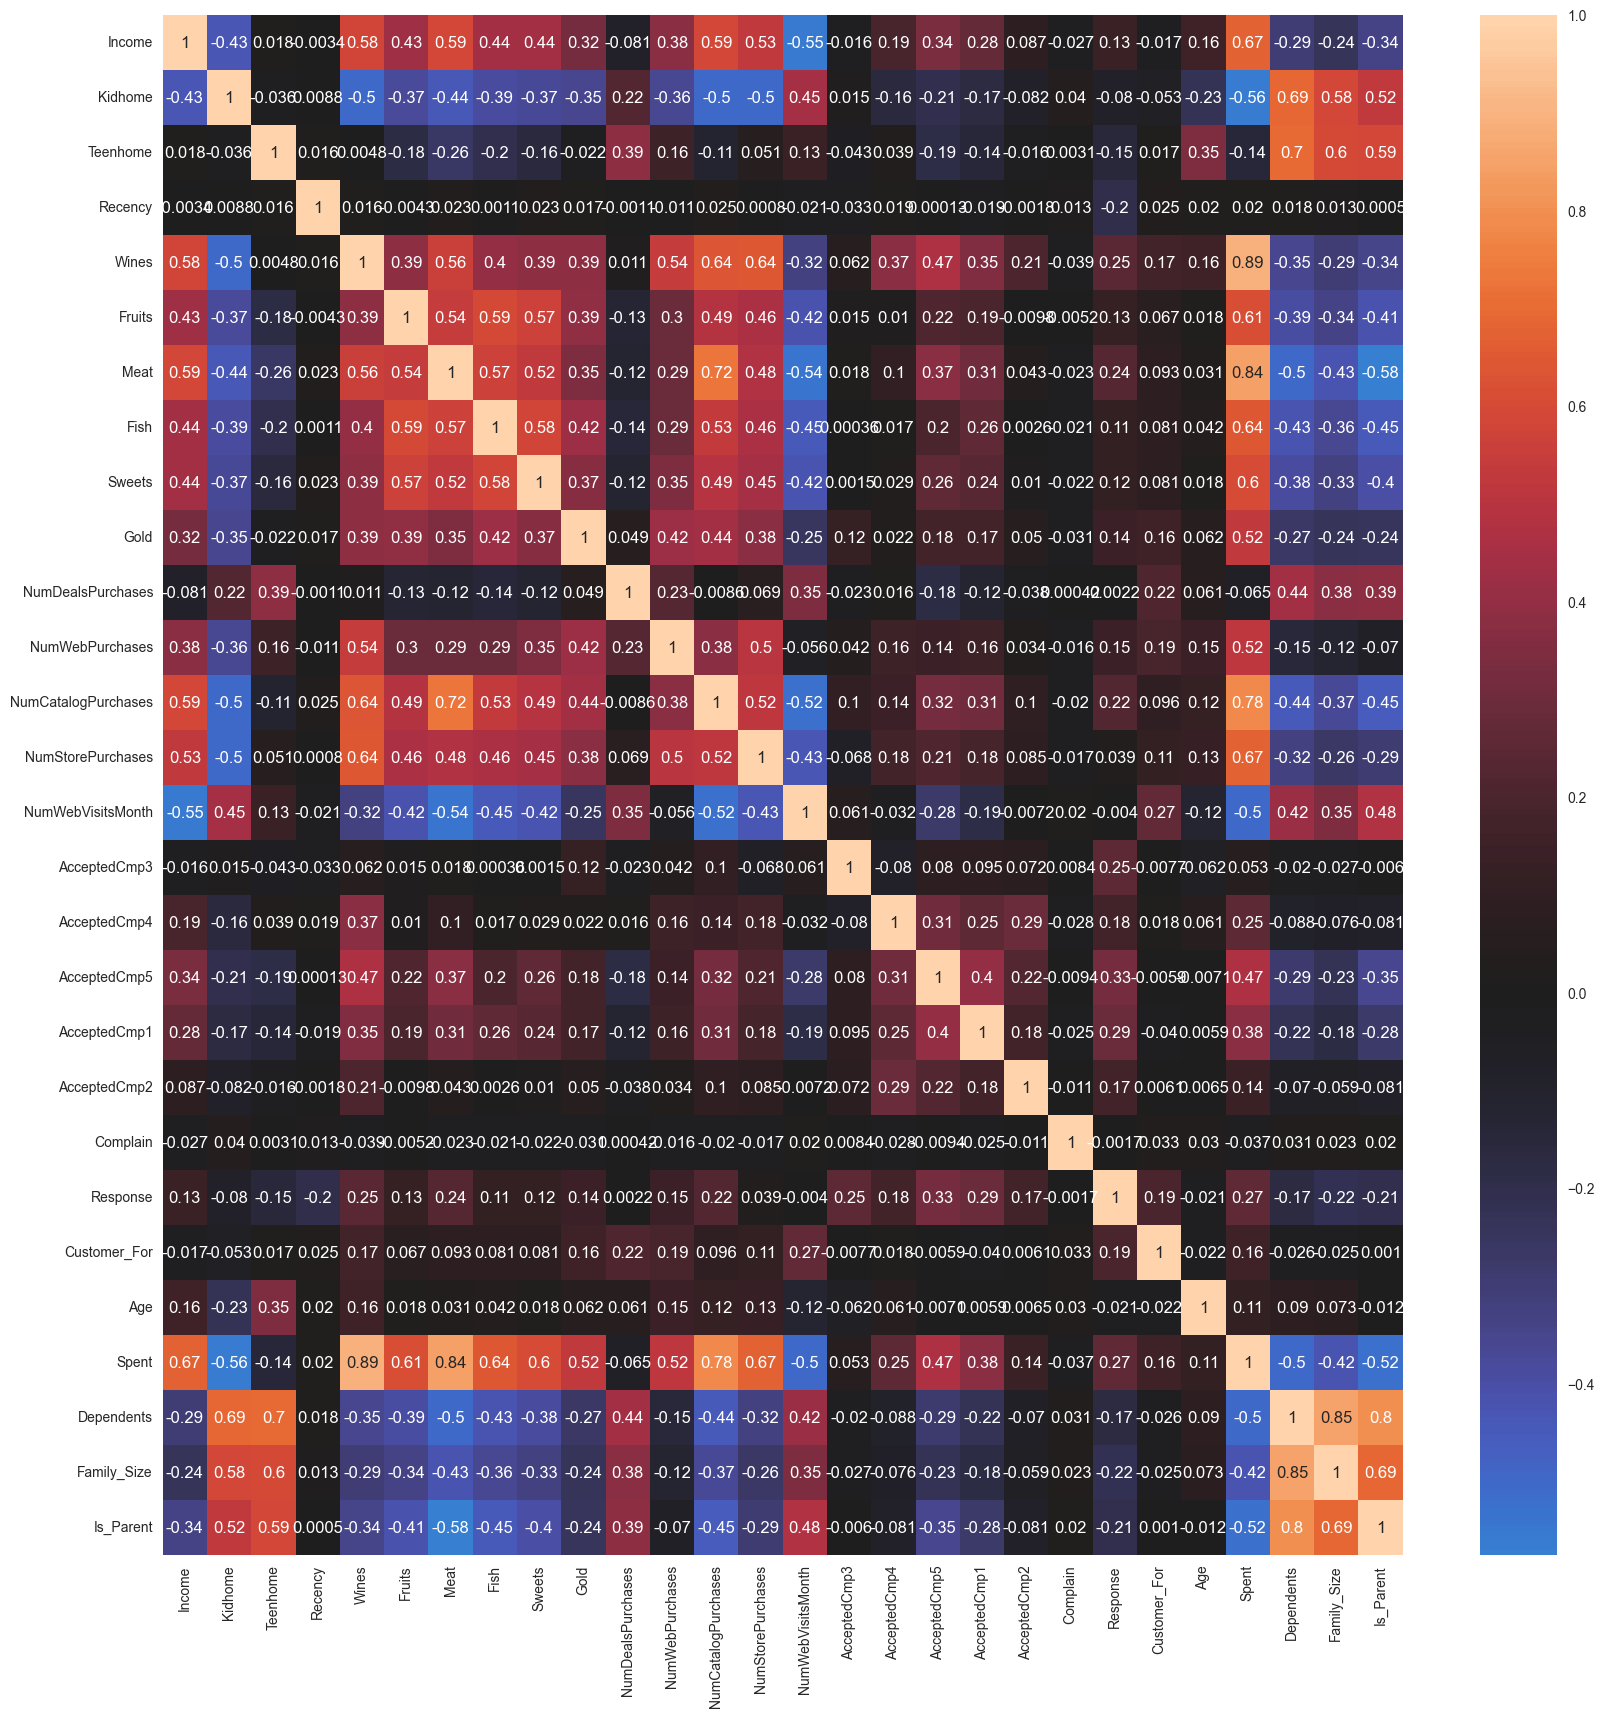

In [14]:
#Plotting the correlation matrix
numeric_cols = data.select_dtypes((int, float)).columns.to_list()
corrmat= data[numeric_cols].corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot=True, center=0)

DATA PREPARATION

In [15]:
#As seen previously, we seem to have 2 customers with age higher than 100 years, and since we don't have any further information, I will opt to eliminate these entries
data = data[(data["Age"]<90)]
#The same goes with the customer with a yearly income of 600000 MU
data = data[(data["Income"]<600000)]

In [16]:
#Let's perform encoding on the categorical (object) type variables
##Find all the categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

##Creating the encoder
label_encoder = LabelEncoder()

##Fitting and Transforming
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])
data[object_cols]

Education  Living
0             0       0
1             0       0
2             0       1
3             0       1
4             1       1
...         ...     ...
2235          0       1
2236          1       1
2237          0       0
2238          1       1
2239          1       1

[2236 rows x 2 columns]

In [17]:
#Performing Data Normalization
data_save = data.copy()
norm_data = data.copy()
##Choosing Variables that are not going to be normalized
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response', "Is_Parent"]
norm_data = norm_data.drop(cols_del, axis=1)

##Aplying Z-Score Normalization
norm_scaler = StandardScaler()
norm_scaler.fit(norm_data)
norm_data = pd.DataFrame(norm_scaler.transform(norm_data), columns= norm_data.columns)
norm_data

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0      -0.89438  0.288734 -0.824939 -0.930615  0.306856  0.983228  1.554170   
1      -0.89438 -0.259985  1.032627  0.905974 -0.383971 -0.871064 -0.636431   
2      -0.89438  0.915663 -0.824939 -0.930615 -0.798467  0.362159  0.572177   
3      -0.89438 -1.176441  1.032627 -0.930615 -0.798467 -0.871064 -0.560893   
4       0.57070  0.295946  1.032627 -0.930615  1.550344 -0.389661  0.421101   
...         ...       ...       ...       ...       ...       ...       ...   
2231   -0.89438  0.432265 -0.824939  0.905974 -0.107640  1.203128  0.421101   
2232    0.57070  0.562117  2.890194  0.905974  0.237773  0.302727 -0.661610   
2233   -0.89438  0.234904 -0.824939 -0.930615  1.446720  1.794481  0.546997   
2234    0.57070  0.805491 -0.824939  0.905974 -1.420212  0.368102  0.093769   
2235    0.57070  0.043592  1.032627  0.905974 -0.314889 -0.654136 -0.586072   

          Meat      Fish    Sweets  ...  NumWebPurchases  NumCatalogPurchases  \
0     1.679746  2.461068  1.475396  ...         1.407639             2.509801   
1    -0.713455 -0.650414 -0.631638  ...        -1.110921            -0.568970   
2    -0.177201  1.344595 -0.147262  ...         1.407639            -0.226884   
3    -0.651409 -0.503991 -0.583200  ...        -0.751127            -0.911056   
4    -0.217088  0.154911 -0.001950  ...         0.328256             0.115201   
...        ...       ...       ...  ...              ...                  ...   
2231  0.066551  0.081700  2.201960  ...         1.767433             0.115201   
2232 -0.607091 -0.687019 -0.655857  ...         1.407639            -0.226884   
2233  0.221666 -0.101329 -0.365231  ...        -0.751127             0.115201   
2234  0.208371  0.777208  0.070707  ...         0.688050             0.799373   
2235 -0.469703 -0.650414 -0.631638  ...        -0.391333            -0.568970   

      NumStorePurchases  NumWebVisitsMonth  Customer_For       Age     Spent  \
0             -0.552429           0.692865      1.529793  1.016868  1.680176   
1             -1.167738          -0.131421     -1.191143  1.273264 -0.962202   
2              1.293496          -0.543564     -0.206659  0.333146  0.282541   
3             -0.552429           0.280722     -1.062517 -1.290693 -0.918994   
4              0.062879          -0.131421     -0.953679 -1.034298 -0.305762   
...                 ...                ...           ...       ...       ...   
2231          -0.552429          -0.131421      0.134695  0.162216  1.221499   
2232          -0.244775           0.692865     -1.656175  1.956986 -0.269201   
2233           2.216459           0.280722     -0.983362 -1.034298  1.055312   
2234           1.293496          -0.955707     -0.978415  1.102333  0.393886   
2235          -0.552429           0.692865      1.326960  1.273264 -0.721231   

        Living  Dependents  Family_Size  
0    -1.347635   -1.264308    -1.758810  
1    -1.347635    1.395139     0.445618  
2     0.742041   -1.264308    -0.656596  
3     0.742041    0.065416     0.445618  
4     0.742041    0.065416     0.445618  
...        ...         ...          ...  
2231  0.742041    0.065416     0.445618  
2232  0.742041    2.724862     2.650045  
2233 -1.347635   -1.264308    -1.758810  
2234  0.742041    0.065416     0.445618  
2235  0.742041    1.395139     1.547831  

[2236 rows x 22 columns]

In [18]:
#Dimentionality Reduction
##Initiating PCA to reduce dimentions to 3 - plot a 3D graph
pca = PCA(n_components=3)
pca.fit(norm_data)
PCA_data = pd.DataFrame(pca.transform(norm_data), columns=(["col1","col2", "col3"]))
PCA_data.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2236.0 -2.542192e-17  2.794749 -5.897827 -2.491064 -0.734246  2.428633   
col2  2236.0  2.542192e-17  1.635388 -3.794141 -1.305786 -0.186330  1.142128   
col3  2236.0 -9.136003e-18  1.229543 -3.588925 -0.831412 -0.070622  0.868568   

           max  
col1  7.302798  
col2  6.326287  
col3  6.686883

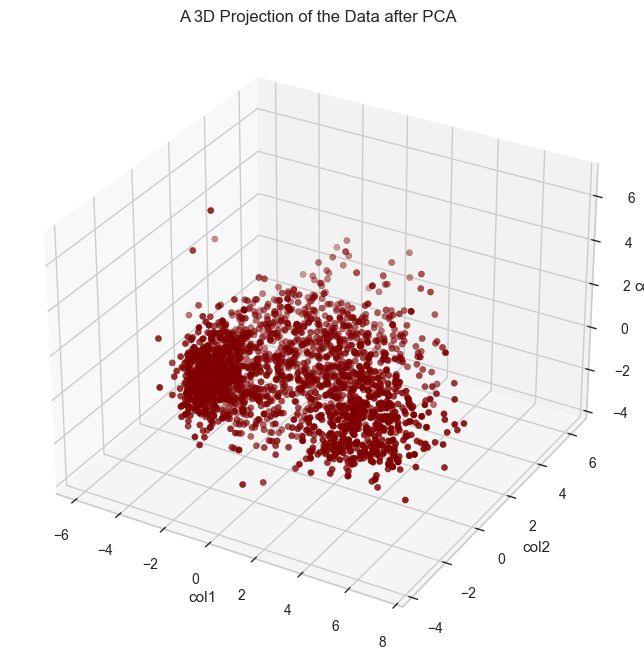

In [19]:
##A 3D Projection Of Data In The Reduced Dimension
x =PCA_data["col1"]
y =PCA_data["col2"]
z =PCA_data["col3"]
##To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection of the Data after PCA")
ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')
plt.show()

CLUSTERING

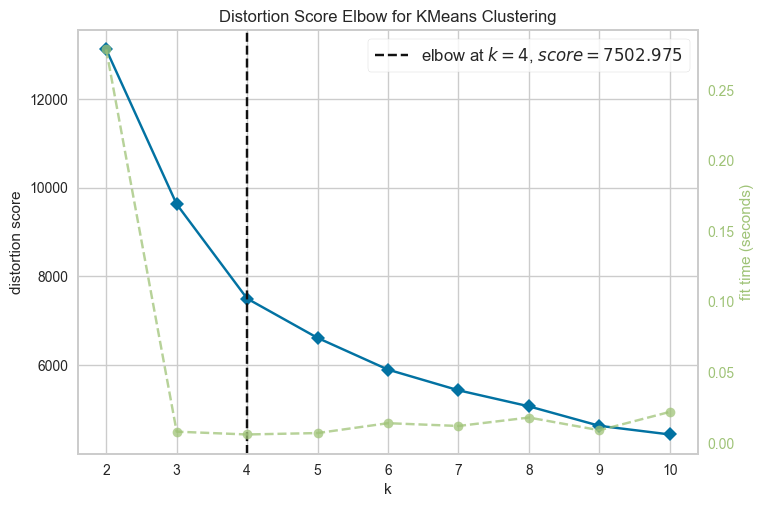

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
#Using the Elbow method to find the optimal number of clusters
##We are using the PCA data to minimize large dviations due to irrelevant features
random.seed(100)
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(PCA_data)
Elbow.show()

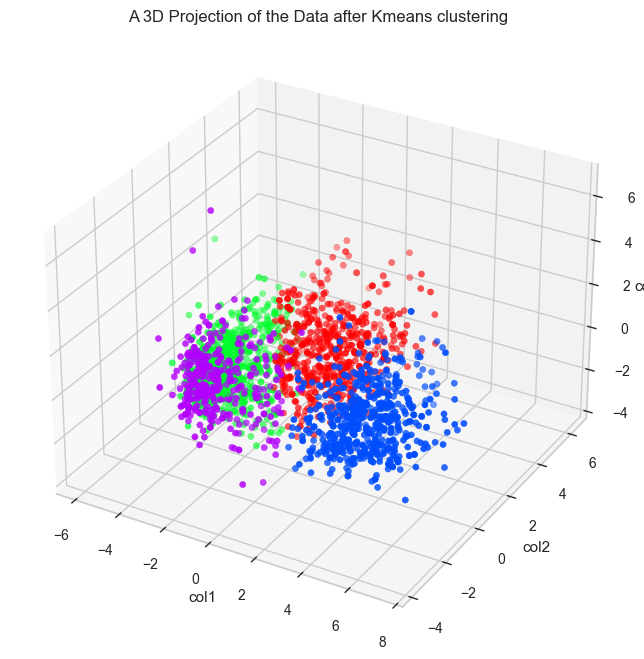

In [21]:
#Applying K-Means
kmeans = KMeans(n_clusters=4)
kmeans.fit(norm_data)
kmeans_clusters = kmeans.labels_
colormap = np.array(['#FF0000', '#00FF2B', '#004DFF', '#B300FF'])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=colormap[kmeans.labels_], marker="o" )
ax.set_title("A 3D Projection of the Data after Kmeans clustering")
ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')
plt.show()

In [22]:
#Since we are working with a lage dataset, we can't work with PAM, but we can with CLARA
clarans_instance = clarans(norm_data, 4, 6, 4)
clarans_instance.process
clusters = clarans_instance.get_clusters() 
medoids = clarans_instance.get_medoids()
clusters

[]

In [23]:
"""!
The pyclustering library clarans implementation requires
list of lists as its input dataset.
Thus we convert the data from numpy array to list.
"""
clarans_data = norm_data.values.tolist()



"""!
@brief Constructor of clustering algorithm CLARANS.
@details The higher the value of maxneighbor, the closer is CLARANS to K-Medoids, and the longer is each search of a local minima.
@param[in] data: Input data that is presented as list of points (objects), each point should be represented by list or tuple.
@param[in] number_clusters: amount of clusters that should be allocated.
@param[in] numlocal: the number of local minima obtained (amount of iterations for solving the problem).
@param[in] maxneighbor: the maximum number of neighbors examined.        
"""
clarans_instance = clarans(clarans_data, 4, 6, 4)

#calls the clarans method 'process' to implement the algortihm
(ticks, result) = timedcall(clarans_instance.process);
print("Execution time : ", ticks, "\n")

#returns the clusters 
clarans_clusters = clarans_instance.get_clusters()

#returns the mediods 
clarans_medoids = clarans_instance.get_medoids()


print("Index of the points that are in a cluster : ", clarans_clusters)
print("The index of medoids that algorithm found to be best : ", clarans_medoids)

Execution time :  13428.409456799971 

Index of the points that are in a cluster :  [[2, 5, 13, 15, 21, 22, 23, 24, 33, 34, 36, 49, 50, 54, 59, 60, 61, 62, 63, 67, 68, 70, 73, 79, 84, 87, 90, 98, 104, 111, 112, 114, 120, 128, 129, 130, 131, 132, 135, 141, 143, 145, 150, 151, 152, 154, 155, 161, 163, 164, 179, 182, 187, 188, 195, 208, 210, 212, 216, 220, 221, 223, 225, 226, 230, 233, 236, 242, 244, 254, 259, 262, 270, 273, 275, 277, 279, 281, 293, 297, 299, 306, 317, 318, 321, 323, 330, 333, 339, 340, 347, 351, 356, 358, 361, 366, 370, 375, 383, 386, 391, 392, 401, 406, 409, 411, 412, 414, 416, 420, 424, 426, 427, 430, 433, 446, 447, 448, 450, 451, 457, 463, 465, 472, 474, 475, 483, 484, 487, 490, 494, 495, 496, 508, 509, 511, 515, 516, 520, 523, 526, 528, 529, 535, 540, 541, 551, 556, 559, 560, 562, 563, 567, 570, 572, 578, 584, 585, 598, 600, 614, 616, 617, 621, 628, 629, 634, 635, 636, 638, 639, 640, 645, 646, 647, 655, 656, 657, 667, 668, 670, 671, 673, 677, 684, 685, 686, 692, 696,

In [24]:
##Indexing the cluster to which each observation is assigned
clarans_list = [0]*len(norm_data)
lengths = []
for i in range(0,4):
    lengths.append(len(clarans_clusters[i]))
    print(len(clarans_clusters[i]))
for j in range (0,4):
    for i in range(0,lengths[j]):
        clarans_list[clarans_clusters[j][i]] = j
clarans_list

586
416
411
823


[2,
 3,
 0,
 3,
 3,
 0,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 0,
 3,
 0,
 3,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 0,
 0,
 3,
 0,
 3,
 1,
 1,
 2,
 3,
 3,
 1,
 3,
 2,
 1,
 3,
 3,
 0,
 0,
 2,
 3,
 2,
 0,
 2,
 2,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 3,
 0,
 0,
 2,
 0,
 3,
 2,
 0,
 1,
 3,
 2,
 2,
 1,
 0,
 1,
 3,
 3,
 1,
 0,
 3,
 3,
 0,
 2,
 3,
 0,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 3,
 3,
 2,
 3,
 2,
 2,
 0,
 0,
 1,
 0,
 3,
 2,
 2,
 3,
 3,
 0,
 3,
 3,
 1,
 2,
 1,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 0,
 1,
 3,
 3,
 3,
 2,
 0,
 2,
 0,
 3,
 0,
 3,
 3,
 3,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 3,
 3,
 1,
 3,
 0,
 3,
 0,
 0,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 2,
 3,
 3,
 0,
 3,
 3,
 0,
 3,
 1,
 3,
 1,
 0,
 0,
 3,
 3,
 2,
 3,
 3,
 3,
 0,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 0,
 2,
 3,
 3,
 0,
 1,
 2,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 2,
 3,
 3,
 0,
 3,
 1,
 0,
 3,
 3,
 0,
 3,
 2,
 2,
 3,
 2,
 0,
 3,
 0,
 2,
 2,
 2,
 1,
 3,


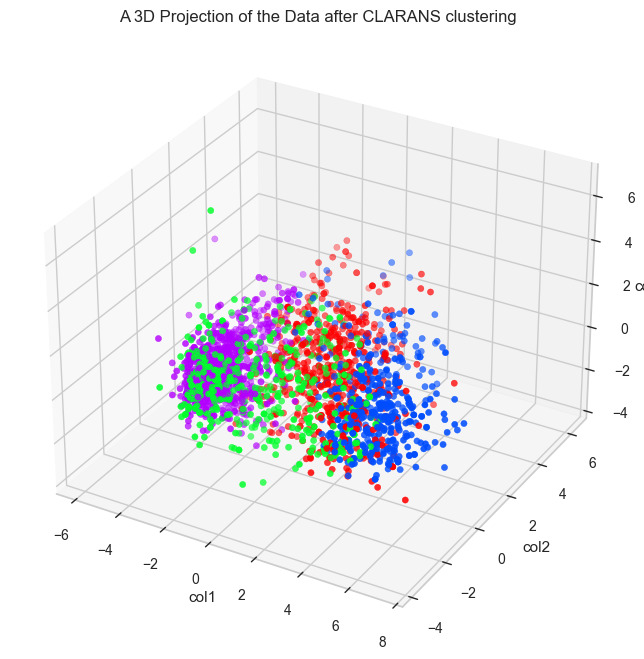

In [25]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=colormap[clarans_list], marker="o" )
ax.set_title("A 3D Projection of the Data after CLARANS clustering")
ax.set_xlabel('col1')
ax.set_ylabel('col2')
ax.set_zlabel('col3')
plt.show()

In [26]:
all_clusts = pd.DataFrame(pd.concat([pd.DataFrame(kmeans_clusters), pd.DataFrame(clarans_list)], axis = 1))
all_clusts.columns = ["Kmeans", "CLARANS"]
all_clusts

Kmeans  CLARANS
0          2        2
1          1        3
2          2        0
3          1        3
4          1        3
...      ...      ...
2231       0        2
2232       1        3
2233       2        1
2234       0        0
2235       1        3

[2236 rows x 2 columns]

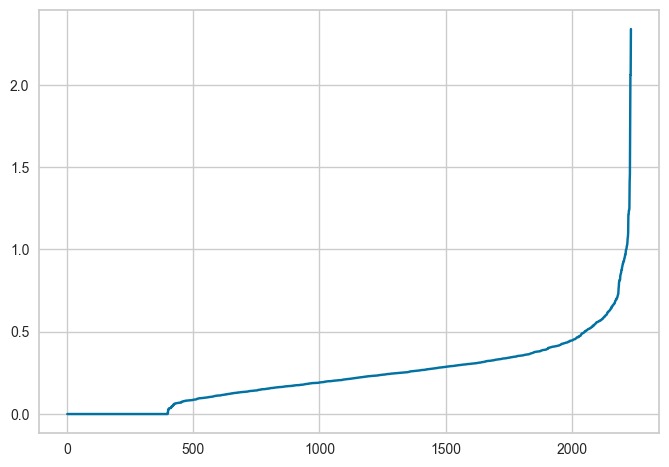

In [27]:
#IMPLEMENTING DBSCAN
##Plotting a graph to find the optimal paramters
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(PCA_data)
distances, indices = neighbors_fit.kneighbors(PCA_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [28]:
#Implementing DBSCAN as a density-based clustering method
dbscan_clust = DBSCAN(eps=0.7, min_samples=4).fit(PCA_data)
all_clusts["DBSCAN"] = dbscan_clust.labels_
all_clusts.DBSCAN.value_counts().to_frame()

count
DBSCAN       
 0       2119
-1         99
 2          6
 1          4
 4          4
 3          4

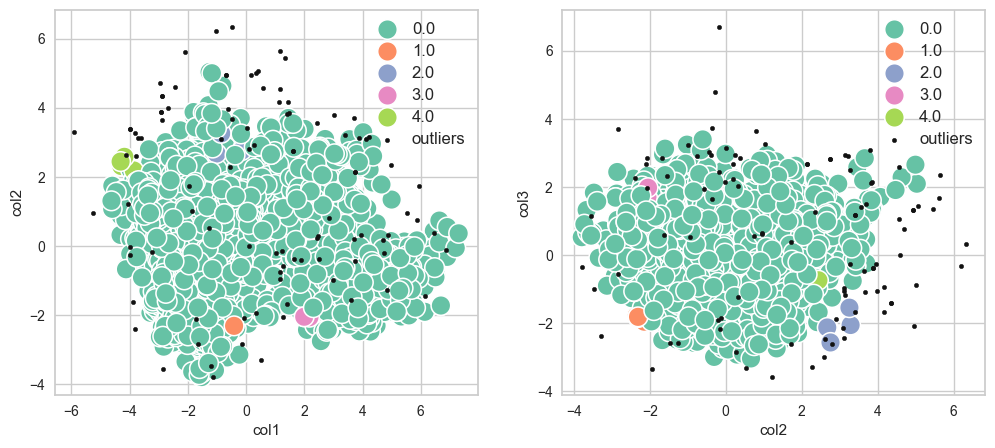

In [29]:
x =PCA_data["col1"]
y =PCA_data["col2"]
z =PCA_data["col3"]
dbscan_data = [x,y,z, all_clusts["DBSCAN"]]
dbscan_data = pd.DataFrame(dbscan_data).T
outliers = dbscan_data[dbscan_data['DBSCAN']==-1]
dbscan_data = pd.DataFrame(dbscan_data)
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot()
sns.scatterplot(x = dbscan_data['col1'],y = dbscan_data['col2'],

                data=dbscan_data[dbscan_data['DBSCAN']!=-1],

                hue='DBSCAN', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x = dbscan_data['col2'],y = dbscan_data['col3'],

                data=dbscan_data[dbscan_data['DBSCAN']!=-1],

                hue='DBSCAN', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers["col1"], outliers["col2"], s=10, label='outliers', c="k")

axes[1].scatter(outliers["col2"], outliers["col3"], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

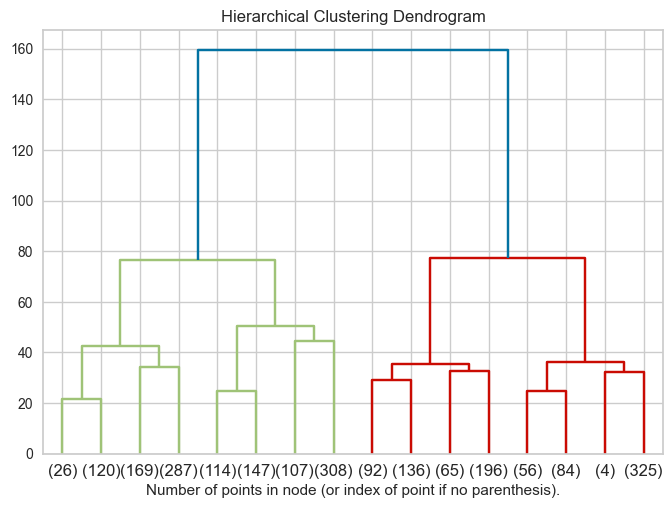

In [30]:
#Implementing a hierarchical clustering algorithm
##Function to plot the dendogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(norm_data)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()




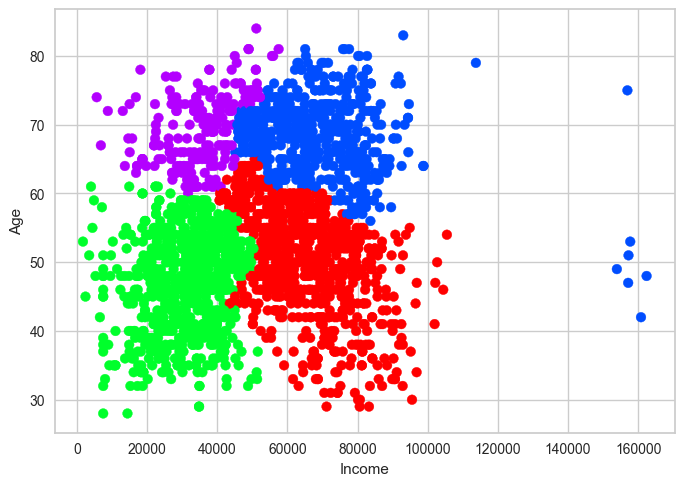

In [31]:
h_data = list(zip(norm_data["Income"], norm_data["Age"]))

hierarchical_cluster = AgglomerativeClustering(n_clusters=4)
hierarchical_cluster.fit(h_data)
h_clusters = hierarchical_cluster.labels_

plt.scatter(x = data_save["Income"], y = data_save["Age"], c=colormap[h_clusters])
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

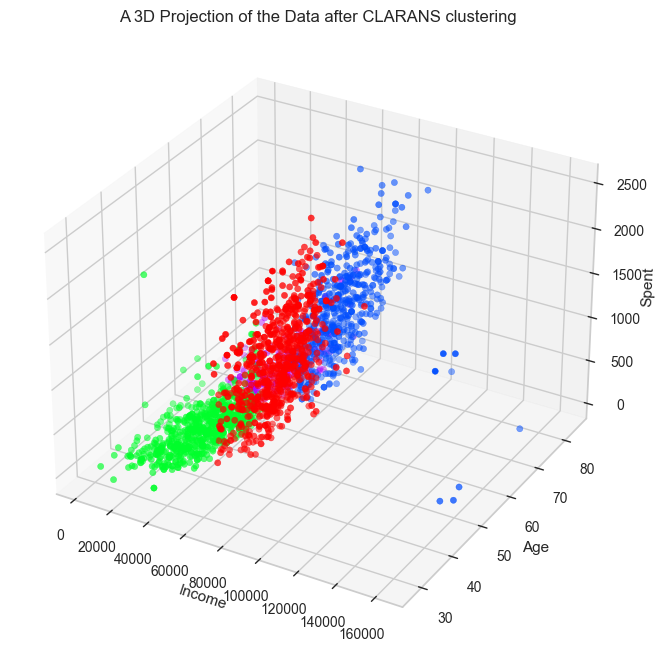

In [32]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data_save["Income"],data_save["Age"], data_save["Spent"], c=colormap[h_clusters], marker="o" )
ax.set_title("A 3D Projection of the Data after CLARANS clustering")
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spent')
plt.show()

EVALUATING RESULTS

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_21084\2861018669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data_save["Cluster"], palette= pal)


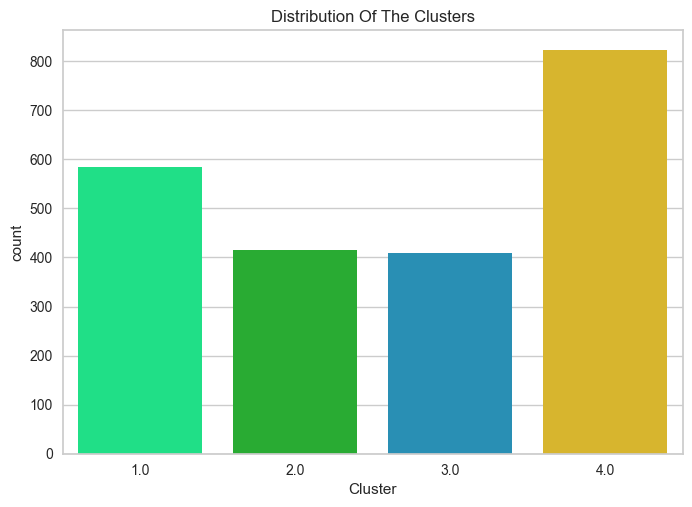

In [47]:
#I'm going to use the CLARANS Clustering Results
pal = ["#00FF89","#14C020", "#129ACB","#F3C612"]
data_save["Cluster"] = all_clusts["CLARANS"] +1
pl = sns.countplot(x=data_save["Cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

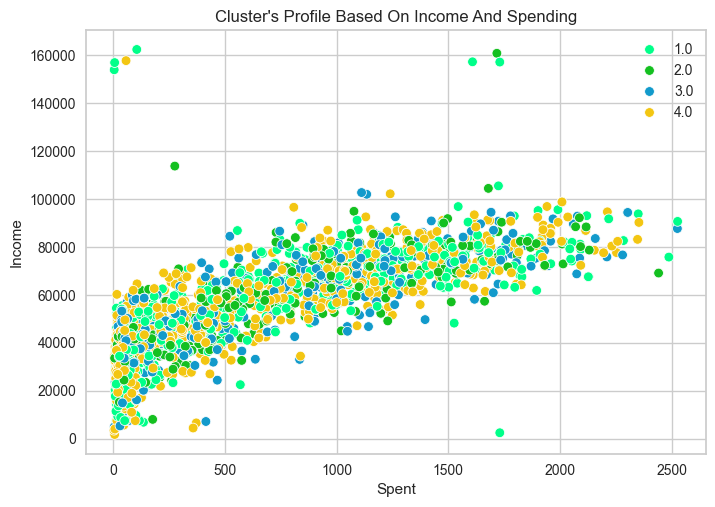

In [48]:
#Checking the clusters characteristics
##Income x Spent
pl = sns.scatterplot(data = data,x=data_save["Spent"], y=data_save["Income"],hue=data_save["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

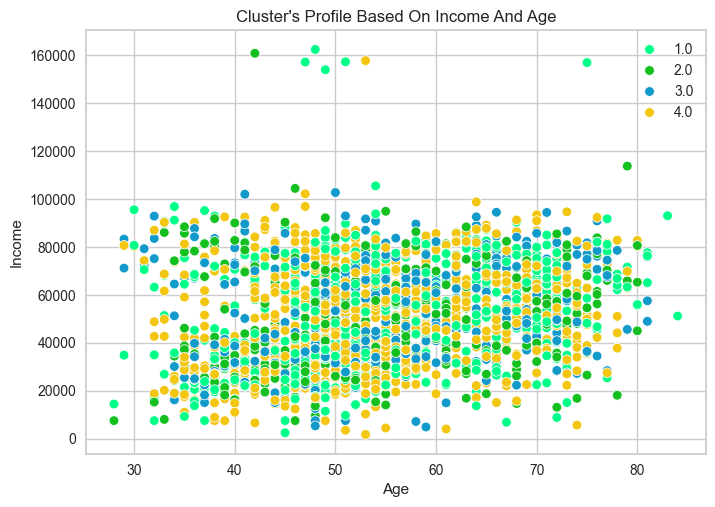

In [49]:
#Checking the clusters characteristics
##Income x Spent
pl = sns.scatterplot(data = data,x=data_save["Age"], y=data_save["Income"],hue=data_save["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Age")
plt.legend()
plt.show()

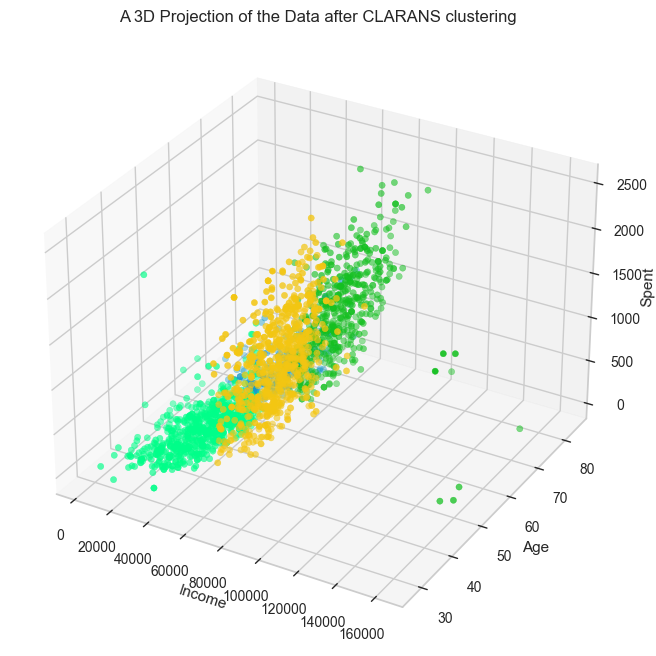

In [50]:
colormap = np.array(["#00FF89","#14C020", "#129ACB","#F3C612"])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data_save["Income"],data_save["Age"], data_save["Spent"], c=colormap[h_clusters-1], marker="o" )
ax.set_title("A 3D Projection of the Data after CLARANS clustering")
ax.set_xlabel('Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spent')
plt.show()

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Rodrigo\AppData\Local\Pac

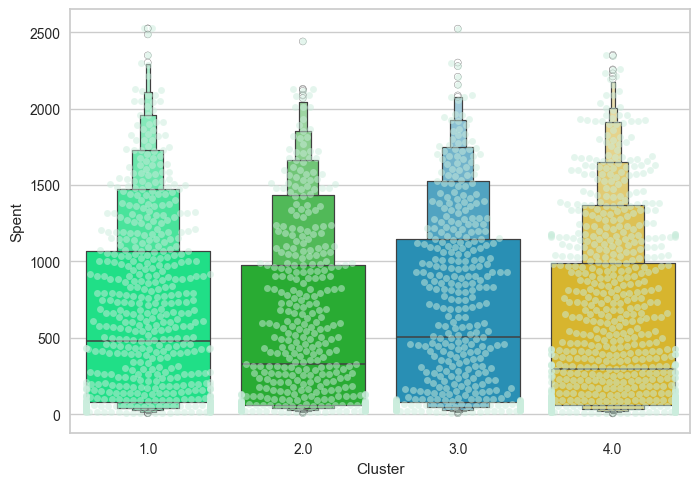

In [51]:
#Money Spent by each cluster
plt.figure()
pl=sns.swarmplot(x=data_save["Cluster"], y=data_save["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_save["Cluster"], y=data_save["Spent"], palette=pal)
plt.show()

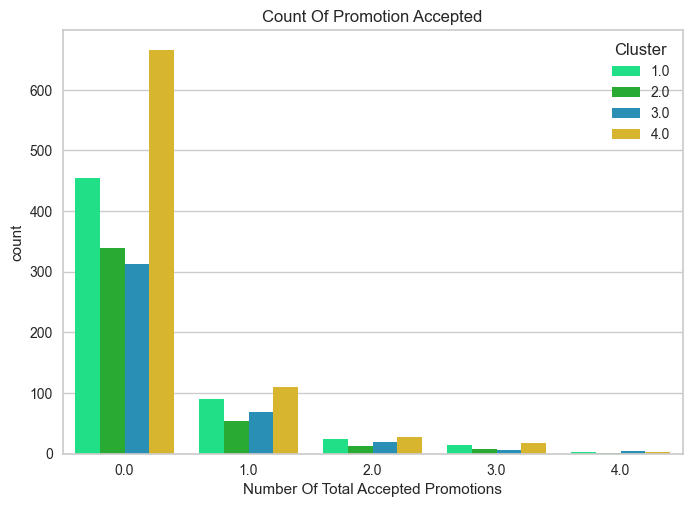

In [52]:
#Now Exploring the acceptance of previous campaigns
data_save["Total_Promos"] = data_save["AcceptedCmp1"]+ data_save["AcceptedCmp2"]+ data_save["AcceptedCmp3"]+ data_save["AcceptedCmp4"]+ data_save["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data_save["Total_Promos"],hue=data_save["Cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_21084\3774268816.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data_save["NumDealsPurchases"],x=data_save["Cluster"], palette= pal)


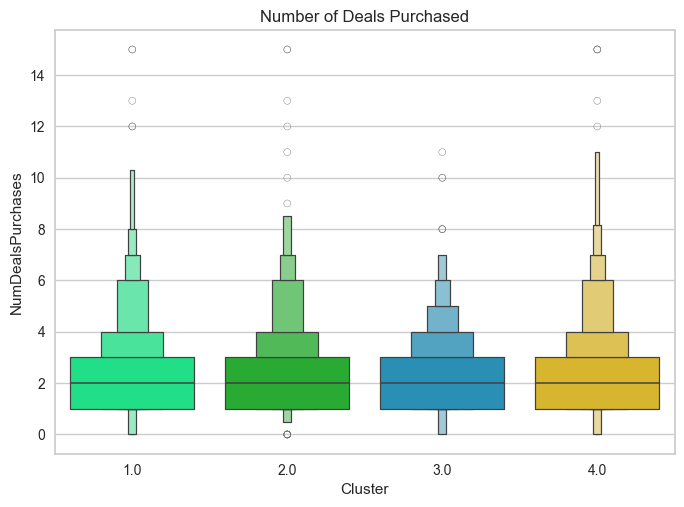

In [53]:
#Understanding the deals purchased
plt.figure()
pl=sns.boxenplot(y=data_save["NumDealsPurchases"],x=data_save["Cluster"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()